Regressió Lineal Simple
===================

***

En aquest apartat veurem un exemple senzill d'ús de la regressió lineal simple.
L'exemple es contextualitzarà en un **data set** que conté el **salari** d'una sèrie de treballadors d'una empresa juntament amb els **anys d'experiència** que té cadascun d'ells.
El que volem veure és si podem relacionar de forma lineal les dues variables: el salari i els anys d'experiència de l'empleat.

Volem analitzar si existeix una relació entre els anys d'experiència i el salari dels treballadors


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

## 0. Anàlisi exploratori de dades

In [2]:
dades = pd.read_csv("dataset/Salary_Data.csv")

In [3]:
dades.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
dades.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
dades.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

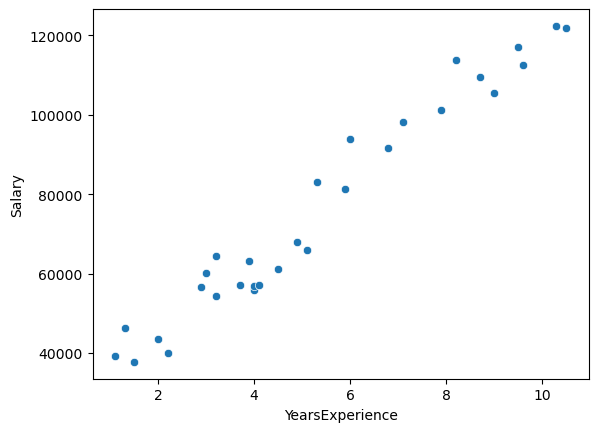

In [6]:
sns.scatterplot(data=dades, x="YearsExperience", y="Salary")

## 1. Anàlisi de la normalitat de les variables

<AxesSubplot:xlabel='YearsExperience', ylabel='Count'>

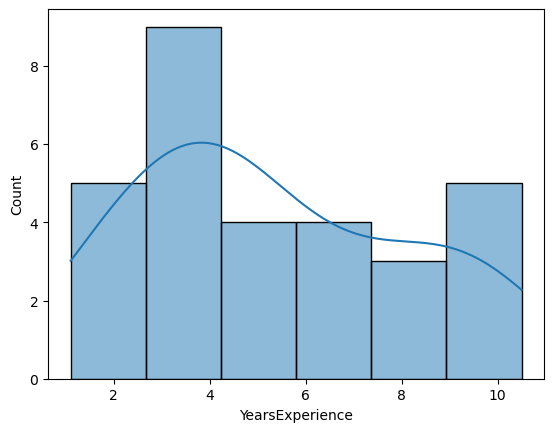

In [6]:
sns.histplot(data=dades, x="YearsExperience", kde=True)

<AxesSubplot:xlabel='Salary', ylabel='Count'>

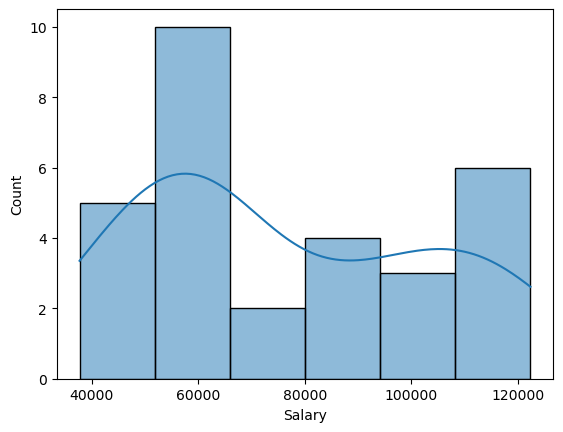

In [11]:
sns.histplot(data=dades, x="Salary", kde=True)

In [14]:
#Pearson
stats.pearsonr(dades["Salary"],dades["YearsExperience"])

PearsonRResult(statistic=0.9782416184887599, pvalue=1.1430681092271564e-20)

Amb el resultat anterior veiem que el coeficient de correlació és molt alt i que el p-valor és baxíssim, per tant podem dir que existeix correlació lineal.

## 2. Generació del model

### Preparem les dades

In [23]:
# Preparem les dades

#seleccionem totes les columnes excepte la última
#x =dades.iloc[:, :-1].values # els anys a l'empresa
#x = dades['YearsExperience'].values.reshape(-1,1)
x = dades.loc[:,'YearsExperience'].values.reshape(-1,1)

#seleccionem només la primera columna.
#y = dades.iloc[:, 1].values # salari
y = dades['Salary'].values.reshape(-1,1)
y = dades.loc[:,'Salary'].values.reshape(-1,1)

### Dividim el data set en conjunt d'entrenament i conjunt de testing

En aquest cas no farem un 80% 20% perquè és un cas molt senzill a on només tenim 30 observacions. Reservarem 2/3 per l'entrenament i 1/3 per el testing

In [39]:

# Dividm les dades amb train i test
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=1/3, random_state=0)

print("Train: %d files, Test: %d files"%(len(x_train),len(x_test)))

Train: 20 files, Test: 10 files


In [41]:

lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

## 3. Predicció mitjançant del model

In [42]:
y_pred = lr.predict(x_test)
y_pred

array([[ 40835.10590871],
       [123079.39940819],
       [ 65134.55626083],
       [ 63265.36777221],
       [115602.64545369],
       [108125.8914992 ],
       [116537.23969801],
       [ 64199.96201652],
       [ 76349.68719258],
       [100649.1375447 ]])

In [31]:
df = pd.DataFrame({"y_test":list(y_test.flatten()),"y_pred":list(y_pred.flatten())})
df["prediccions"]=[i for i in range(6)]
df

,y_test,y_pred,prediccions
0,91738.0,90941.300464,0
1,112635.0,117420.330095,1
2,57081.0,65407.950462,2
3,54445.0,56896.833795,3
4,39891.0,47440.037498,4
5,121872.0,125931.446762,5


In [34]:
#Afegim com a columna (cols els valors de cada)
dfm = df.melt('prediccions', var_name='cols', value_name='salari')
dfm

,prediccions,cols,salari
0,0,y_test,91738.000000
1,1,y_test,112635.000000
2,2,y_test,57081.000000
3,3,y_test,54445.000000
4,4,y_test,39891.000000
5,5,y_test,121872.000000
6,0,y_pred,90941.300464
7,1,y_pred,117420.330095
8,2,y_pred,65407.950462
9,3,y_pred,56896.833795


<AxesSubplot:xlabel='prediccions', ylabel='salari'>

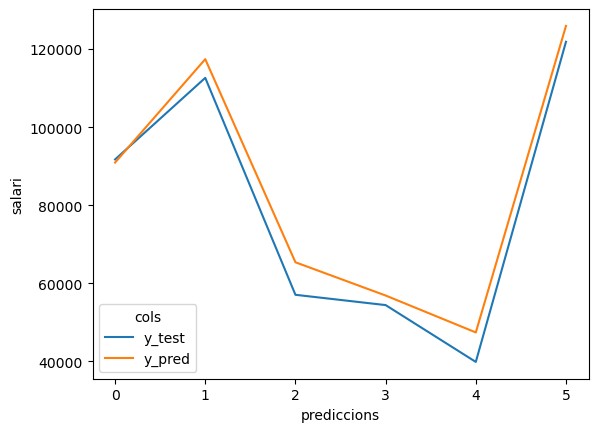

In [35]:
sns.lineplot(data=dfm, x="prediccions", y="salari", hue="cols")

### Visualitzem el resultat de l'entrenament i test

Fixem-nos amb el següents gràfics.

El primer tenim la dispersió dels punts d'entrenament (x_train, y_train) i la recta utilitzant les prediccions de Y a través del conjunt d'entrenament.

En el segon gràfic tenim la mateixa recta que la d'entrenament i ara la comparem amb els punts de dispersió dels de test.
Veiem que la recta s'ajusta força bé en els punts de test. Fins i tot alguns passen per sobre.b

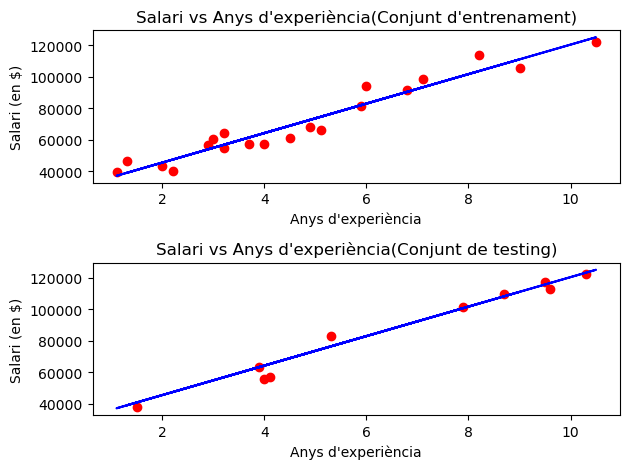

In [89]:
#fig = sns.regplot(x=x_train.squeeze(),y=y_train.squeeze())
#fig.set(xlabel="Anys d'experiència", ylabel="Salari (en $)")

fig, (ax1,ax2) = plt.subplots(2,1)

ax1.scatter(x_train, y_train, color = "red")
ax1.plot(x_train, lr.predict(x_train), color = "blue")
ax1.set_title("Salari vs Anys d'experiència(Conjunt d'entrenament)")
ax1.set_xlabel("Anys d'experiència")
ax1.set_ylabel("Salari (en $)")

ax2.scatter(x_test, y_test, color = "red")
ax2.plot(x_train, lr.predict(x_train), color = "blue")
ax2.set_title("Salari vs Anys d'experiència(Conjunt de testing)")
ax2.set_xlabel("Anys d'experiència")
ax2.set_ylabel("Salari (en $)")

#fig.tight_layout(pad=5.0)
fig.tight_layout()
plt.show()

## 4. Avaluació del model

Per avaluar el model utilitzarem les mètriques que ens proporciona el ScikitLearn

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculme MSE
mse = mean_squared_error(y_test, y_pred, squared=True)

# Calculem RMSE Arrel de l'Error Quadràtic Mig (MSE)
rmse = mean_squared_error(y_test, y_pred,squared=False)

# Calculem R-quadrat
rsq = r2_score(y_test, y_pred)

print("MSE: %.4f" % mse)
print("RMSE: %.4f" % rmse)
print('R-quadrat: %.5f' % rsq)

MSE: 32599636.7941
RMSE: 5709.6092
R-quadrat: 0.95600


In [91]:
# Mostrem els coeficent obtingut:
print('Coeficient \u03B21: %.5f' % lr.coef_)

# Valor del temre independent (X=0)
print('Terme independent \u03B20: %.5f' % lr.intercept_)

print("Coeficient de determinació R^2:", lr.score(x, y))



Coeficient β1: 9345.94244
Terme independent β0: 26816.19224
Coeficient de determinació R^2: 0.9565349708076958
